In [1]:
##      Importer les librairies pandas numpy seaborn matplotlib.pyplot

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df = pd.read_csv('/kaggle/input/housedata/data.csv')

/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat


In [2]:
df.shape
df.isnull().sum()
df.dtypes
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


**Question 2**

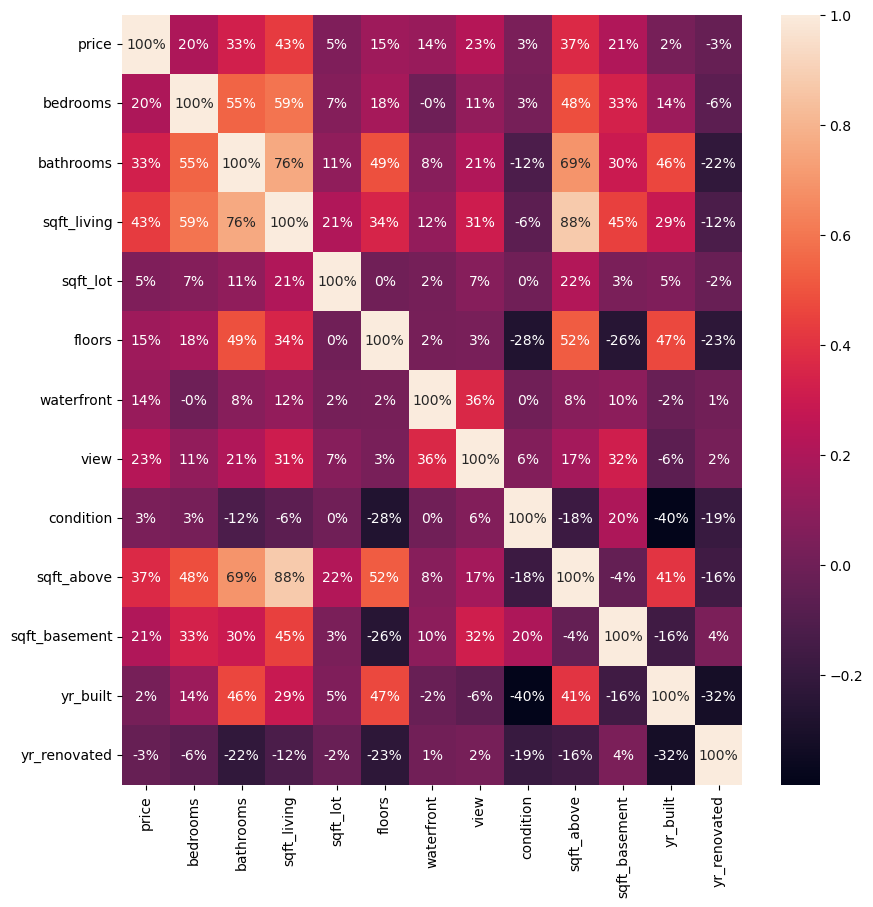

In [3]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.0%')
plt.show()

**Question 3**

On constate des colonnes de type float
Il faudrait dans l'idéal avoir des int 
nous allons donc devoir les converitr

In [4]:
df['price'] = df['price'].astype('int64')
df['bedrooms'] = df['bedrooms'].astype('int64')
df['bathrooms'] = df['bathrooms'].astype('int64')
df['floors'] = df['floors'].astype('int64')

**Question 4**

In [5]:
df.dtypes

date             object
price             int64
bedrooms          int64
bathrooms         int64
sqft_living       int64
sqft_lot          int64
floors            int64
waterfront        int64
view              int64
condition         int64
sqft_above        int64
sqft_basement     int64
yr_built          int64
yr_renovated      int64
street           object
city             object
statezip         object
country          object
dtype: object

On remarque tout est bien en int

**Question 5**

Les prix sont tous élevé

**Question 6**

In [6]:
df['price'].replace(0, np.nan, inplace=True)

**Question 7**

In [7]:
df.isna().sum()

date              0
price            49
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
street            0
city              0
statezip          0
country           0
dtype: int64

**Question 8**

In [8]:
df['price'].fillna(df['price'].mean(), inplace=True)

**Question 9**

In [9]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

**Question 10**

In [10]:
ville = pd.get_dummies(df['city'])
ville.head()

,Algona,Auburn,Beaux Arts Village,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Question 11**

In [11]:
df.drop(['city', 'country', 'statezip', 'street', 'date'], axis=1, inplace=True)

**Question 12**

In [12]:
dt = pd.concat([df, ville], axis=1)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Cols = list(dt.columns)
scaled_df = scaler.fit_transform(dt[Cols])
scaled_df = pd.DataFrame(scaled_df, columns=Cols)

**Question 13**
    ·        Créer la variable cible y  y=scaled_df[‘cible’]
    ·        Créer X=scaled_df en supprimant la variable cible.

In [14]:
y = scaled_df['price']
X = scaled_df.drop(['price'], axis=1)

**Question 14**

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Question 15**

In [16]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [17]:
lr = linear_model.LinearRegression()
lr.fit(X_train, Y_train)  #phase d’apprentissage
pred = lr.predict(X_test)
score=r2_score(Y_test,pred)
score                    

0.7007213964567389

In [18]:
print('Mean Absolute Error:', mean_absolute_error(Y_test, pred))
print('Mean Squared Error:', mean_squared_error(Y_test, pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, pred)))

Mean Absolute Error: 0.22170829923083996
Mean Squared Error: 0.13750557396322113
Root Mean Squared Error: 0.3708174402090888


**Question 16**


In [19]:
lasso = linear_model.Lasso()
lasso.fit(X_train, Y_train)
pred = lasso.predict(X_test)
score = r2_score(Y_test, pred)
score

-0.00041501163547019715

In [20]:
print('Mean Absolute Error:', mean_absolute_error(Y_test, pred))
print('Mean Squared Error:', mean_squared_error(Y_test, pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, pred)))

Mean Absolute Error: 0.4179327864635452
Mean Squared Error: 0.4596474280075723
Root Mean Squared Error: 0.6779730289676517


In [21]:
ridge = linear_model.Ridge()
ridge.fit(X_train, Y_train)
pred = ridge.predict(X_test)
score = r2_score(Y_test, pred)
score

0.7006946755609558

In [22]:
print('Mean Absolute Error:', mean_absolute_error(Y_test, pred))
print('Mean Squared Error:', mean_squared_error(Y_test, pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, pred)))

Mean Absolute Error: 0.22170236062656698
Mean Squared Error: 0.13751785105910425
Root Mean Squared Error: 0.3708339939367806
